<a href="https://colab.research.google.com/github/ayeshammn/Object-Recognition-Using-ResNet/blob/main/CIFAR_10_Object_Recognition_using_ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install kaggle


In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c cifar-10

 99% 711M/715M [00:11<00:00, 110MB/s]
100% 715M/715M [00:11<00:00, 63.8MB/s]


In [9]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [10]:
import zipfile

# Define the path to the uploaded ZIP file
zip_file_path = '/content/cifar-10.zip'

# Create the extraction directory if it doesn't exist
!mkdir -p $extract_path

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()
    print("Extracted file")

mkdir: missing operand
Try 'mkdir --help' for more information.
Extracted file


In [11]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [12]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.3 MB/s eta 0:00:00


In [13]:
import py7zr
archieve = py7zr.SevenZipFile('/content/train.7z', mode = 'r')
archieve.extractall()
archieve.close()

In [14]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Import dependancies

In [15]:
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img
from sklearn.model_selection import train_test_split

In [16]:
filenames = os.listdir('/content/train')

In [17]:
len(filenames)

50000

In [18]:
print(filenames[:5])
print(filenames[-5:])

['10939.png', '6299.png', '26874.png', '6627.png', '32364.png']
['12806.png', '10074.png', '24823.png', '8533.png', '27460.png']


In [19]:
label_df = pd.read_csv('/content/trainLabels.csv')

In [20]:
label_df.shape

(50000, 2)

In [21]:
label_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [22]:
label_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [23]:
label_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [24]:
label_dictionaries = {'airplane':0, 'dog':1, 'cat':2, 'ship':3, 'horse':4, 'bird':5, 'automobile':6, 'deer':7, 'truck':8, 'frog':9}

labels = [label_dictionaries[i] for i in label_df['label']]

In [25]:
print(labels)

[9, 8, 8, 7, 6, 6, 5, 4, 3, 2, 7, 4, 4, 5, 8, 8, 8, 2, 5, 9, 7, 2, 9, 9, 5, 9, 2, 1, 7, 0, 0, 8, 6, 2, 7, 0, 2, 4, 2, 2, 1, 5, 5, 4, 6, 6, 6, 5, 5, 0, 8, 1, 4, 8, 5, 5, 1, 5, 7, 2, 6, 6, 3, 5, 6, 6, 7, 8, 4, 3, 1, 8, 9, 4, 2, 6, 8, 0, 2, 6, 2, 1, 7, 1, 4, 4, 7, 4, 8, 7, 5, 2, 3, 0, 6, 9, 6, 6, 7, 6, 3, 2, 8, 9, 9, 6, 3, 1, 5, 8, 8, 3, 6, 4, 4, 0, 0, 9, 8, 6, 5, 5, 8, 5, 9, 9, 6, 8, 1, 0, 7, 4, 9, 4, 6, 3, 6, 6, 5, 3, 6, 2, 2, 9, 5, 7, 8, 8, 1, 7, 2, 9, 4, 7, 9, 3, 1, 1, 7, 2, 6, 3, 7, 4, 9, 0, 8, 1, 6, 2, 3, 5, 4, 1, 2, 7, 6, 1, 4, 0, 7, 4, 1, 1, 6, 0, 8, 9, 8, 0, 3, 4, 3, 3, 5, 1, 5, 2, 1, 0, 9, 6, 8, 2, 9, 8, 6, 2, 8, 9, 9, 4, 6, 0, 8, 1, 3, 1, 5, 8, 0, 3, 3, 0, 9, 8, 6, 6, 9, 2, 4, 9, 9, 0, 9, 9, 6, 4, 6, 1, 3, 2, 9, 9, 3, 9, 3, 7, 9, 9, 6, 2, 3, 2, 7, 6, 4, 6, 2, 3, 1, 6, 6, 7, 0, 8, 2, 4, 7, 8, 8, 5, 7, 8, 8, 6, 0, 1, 8, 0, 3, 5, 6, 5, 0, 1, 9, 2, 5, 4, 3, 3, 9, 0, 4, 8, 7, 1, 9, 7, 5, 6, 6, 5, 6, 1, 8, 8, 0, 3, 7, 6, 6, 9, 2, 2, 8, 0, 4, 8, 4, 4, 8, 6, 1, 6, 9, 9, 3, 4, 6, 2, 0, 

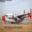

In [26]:
#displays sample images

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/10897.png')
cv2_imshow(img)



In [27]:
id_list = list(label_df['id'])

**Image** **Processing**

In [28]:
#convert images to numpy array

train_data_folder = '/content/train/'

data = []

for id in id_list:
  img_path = train_data_folder + str(id) + '.png'
  image = Image.open(img_path)
  image = np.array(image)
  data.append(image)


In [29]:
len(data)

50000

In [30]:
data[0].shape

(32, 32, 3)

In [31]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [32]:
#convert image and label lists into numpy array

X = np.array(data)
Y = np.array(labels)

In [33]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [35]:
print(X.shape, X_test.shape, X_train.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (40000, 32, 32, 3)


In [36]:
#scaling the data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [37]:
X_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

**Building** **Neural** **Network**

In [38]:
import tensorflow as tf
from tensorflow import keras


In [39]:
num_of_class = 10

#setting up layers of the neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(num_of_class, activation = 'softmax')


])

In [40]:
#compile the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])

In [41]:
#training neural network
model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 9s 8ms/step - loss: 2.0058 - acc: 0.2669 - val_loss: 1.8826 - val_acc: 0.3065
Epoch 2/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.8749 - acc: 0.3138 - val_loss: 1.8317 - val_acc: 0.3298
Epoch 3/10
1125/1125 [==============================] - 8s 7ms/step - loss: 1.8448 - acc: 0.3283 - val_loss: 1.8484 - val_acc: 0.3370
Epoch 4/10
1125/1125 [==============================] - 6s 6ms/step - loss: 1.8298 - acc: 0.3348 - val_loss: 1.8279 - val_acc: 0.3280
Epoch 5/10
1125/1125 [==============================] - 8s 7ms/step - loss: 1.8130 - acc: 0.3419 - val_loss: 1.8216 - val_acc: 0.3408
Epoch 6/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.8051 - acc: 0.3453 - val_loss: 1.7938 - val_acc: 0.3510
Epoch 7/10
1125/1125 [==============================] - 8s 7ms/step - loss: 1.7941 - acc: 0.3520 - val_loss: 1.8182 - val_acc: 0.3358
Epoch 8/10
1125/1125 [==============================] - 6s 5ms

**ResNet 50**

In [42]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [43]:
convolutional_base = ResNet50(weights = 'imagenet', include_top = False, input_shape = (256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      

In [44]:
num_of_class = 10

model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_class, activation = 'relu'))


In [47]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(X_train_scaled, Y_train, validation_split = 0.1, epochs=10)

Epoch 1/10
  69/1125 [>.............................] - ETA: 9:29:49 - loss: 8.9842 - acc: 0.1141

In [ ]:
h = history

#plot loss values

plt.plot(h.history['loss'], label = 'train_loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'], label = 'train_accuracy')
plt.plot(h.history['val_acc'], label = 'validation_accuracy')
plt.legend()
plt.show()

